# 2. Machine Learning 에 많이 사용되는 특수한 형태의 matrix 와 vector
- 대각행렬(diagonal matrix)  
- 대칭행렬(symmetric matrix)
- 단위벡터(unit vecotr)
- 정규화(normalization)
- 직교벡터(orthogonal vector)

## 대각행렬(diagonal matrix) 
다음 조건을 만족시키는 행렬:
$$ D_{i, j} = 0 \text{ for all } i \neq j $$

대각행렬의 계산은 computationally efficient:  
$\begin{bmatrix}
    1 & 0 & 0 \\
    0 & 2 & 0 \\
    0 & 0 & 3
 \end{bmatrix}$ *
$\begin{bmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1
 \end{bmatrix}$ = 
 $\begin{bmatrix}
     1(1) & 1(1) & 1(1) \\
     2(1) & 2(1) & 2(1) \\
     3(1) & 3(1) & 3(1)
   \end{bmatrix}$

## 대칭행렬(symmetric matrix)
다음 조건을 만족하는 행렬:  
$$ A = A^T $$  
ex) $$\begin{bmatrix}
        1 & 2 & 3 \\
        2 & 3 & 4 \\
        3 & 4 & 5 \\
     \end{bmatrix}$$

## 단위벡터(unit vecotr)
단위 norm 인 vector :
$$||x||_2 = 1$$
단위 벡터는 벡터 정규화 (vector normalization) 을 통해 얻어진다. 벡터 정류화란 vector 를 vector 를 magnitude (크기) 로 나누어 주는 것이다.
$$\frac{x}{||x||_2} = \text{ unit vector }$$
ex) $$x = [1, 1, 1, 1]$$
$$\frac{x}{\sqrt{(1^2 + 1^2 + 1^2 + 1^2)}} = \frac{x}{\sqrt{4}} = [\text{1/2 1/2 1/2 1/2}]$$

## 직교벡터(orthogonal vector)
서로 90도를 이루는 크기가 0 이 아닌 두 vector. 두 벡터가 단위 벡터인 경우 orthonormal 이라고 부른다.

## Eigenvalue(고유값) 와 Eigenvector(고유벡터)

- 고유값 분해 (Eigendecomposition)  

    Breaking mathematical objects into their constituent parts !  
    
    We can decompose matrices in ways that reveals information about their functional properties that is not immediately obvious from the representation of the matrix as an array of elements.
    
    $$ \text{Matrix} ==> \begin{cases}
                    \text{Eigenvalues} \\
                    \text{Eigenvectors}
                   \end{cases}$$
                   
- Eigenvector of square matrix A is a non-zero vector v such that multiplication by A alters only the scale of v  
$$\text{Av} = \lambda \text{A}$$
$$ \text{v : eigenvector}$$
$$ \lambda \text{: a scaler, the eigenvalue corresponding to v}$$ 

<img src="eigen.png" width="500">

## 고유값분해(Eigendecomposition)
If a matrix A has n linearly independent eigenvectors ...  

we can form a matrix V with one eigenvector per column,  
and a vector $\lambda$ of all the eigenvalues.

The eigendecomposition of A is then given by:  
$$A = Vdiag(\lambda)V^{-1}$$

$$diag : \text{Diagonal Matrix}$$
$$V^{-1} : \text{Inverse Matrix}$$

### The Inverse Matrix (역행렬)

$$AA^{-1} = A^{-1}A = I$$
$$\text{where $I$ is the identity matrix}$$

### Indentity Matrix (단위행렬, 항등행렬)

- 단위 혹은 항등행렬은:  
    대각행렬(2X2, 3X3, 등)이며, 대각선에 1, 기타 위치에는 0 으로 채워진 행렬이다.$\text{  }$
$\begin{bmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
    \end{bmatrix}$
    
역행렬은 것은 정수 (integer) 의 역수 (reciprocal)와 유사함.

### 고유값분해 (Eigendecomposition) 의 특성

- 모든 행렬이 eigenvalue 와 eigenvector 로 나뉠 수 있는 것은 아니다.
- A matrix is singular (the inverse doesn't exist) if any of the eigenvalues are zero.

### 고유값분해의 machine learning 에서의 용도
- PCA (Principal Component Analysis) 에 사용

PCA is a statistical procedure that is used to convert a set of observations of possibly correlated values into a set of values of linearly uncorrelated values called principal component.

즉, PCA 는 data 를 summarize 하거나 compress 하는 방법이다.

In [1]:
import numpy as np
import sys

In [6]:
print(sys.version)
print()
print(np.__version__)

3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]

1.15.0


In [7]:
from numpy import linalg

In [8]:
# define an array
A = np.arange(9) - 3
A

array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

In [9]:
B = A.reshape((3,3))
B

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [11]:
# 유클리드 노름 (Euclidean norm) = L2 norm (default of numpy norm)
print(np.linalg.norm(A))
print(np.linalg.norm(B))

8.306623862918075
8.306623862918075


In [14]:
# Frobenious norm - L2 norm for a matrix (vector 에는 사용 못함)
np.linalg.norm(B, 'fro')

8.306623862918075

In [19]:
# the max norm (P = infinity)
print(np.linalg.norm(A, np.inf))   # max(sum(abs(x), axis=1))
print(np.linalg.norm(B, np.inf))   

5.0
12.0


In [26]:
# vector normalization - normalization to produce a unit vector
norm = np.linalg.norm(A)
A_unit = A / norm        # unit vector
A_unit

array([-0.36115756, -0.24077171, -0.12038585,  0.        ,  0.12038585,
        0.24077171,  0.36115756,  0.48154341,  0.60192927])

In [78]:
# the magnitude of unit vector is equal to 1
np.linalg.norm(A_unit)

0.9999999999999999

In [79]:
# find eigenvalues and eigenvector for a simple square matrix
A = np.diag(np.arange(1,4))
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

- Eigenvector of square matrix A is a non-zero vector v such that multiplication by A alters only the scale of v  
$$\text{Av} = \lambda \text{A}$$
$$ \text{v : eigenvector}$$
$$ \lambda \text{: a scaler, the eigenvalue corresponding to v}$$ 

In [100]:
# find eigenvalues and eigenvectors using numpy linalg.eig
eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print()
print(eigenvectors)   # each column is an eigenvector

[1. 2. 3.]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [81]:
# the eigenvalue w[i] corresponds to the eigenvector v[:, i] 
print('eigenvalue {}'.format(eigenvalues[1]))
print('eigenvector {}'.format(eigenvectors[:, 1]))

eigenvalue 2.0
eigenvector [0. 1. 0.]


- The eigendecomposition of A is given by:  
$$A = Vdiag(\lambda)V^{-1}$$

$$diag : \text{Diagonal Matrix}$$
$$V^{-1} : \text{Inverse Matrix}$$


In [82]:
# verify eigendecompisition
matrix = np.matmul(np.diag(eigenvalues), np.linalg.inv(eigenvectors))
output = np.matmul(eigenvectors, matrix).astype(np.int)
output

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

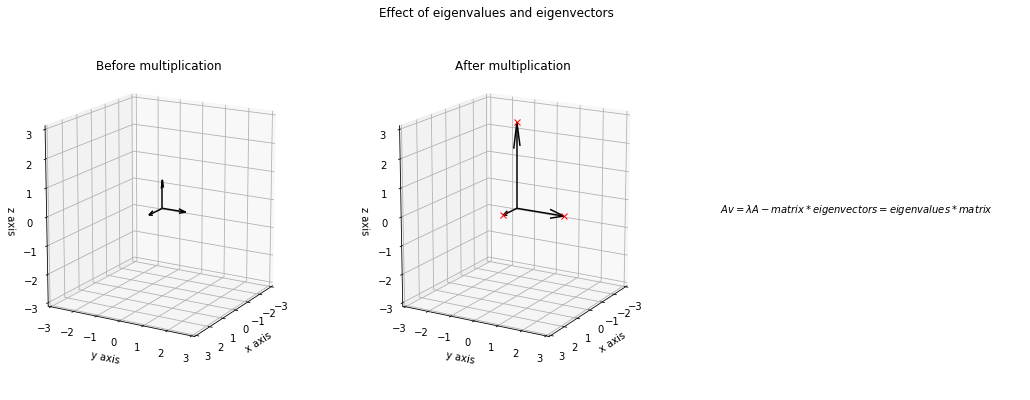

In [132]:
# plot the eigenvectors
origin = [0,0,0]

fig = plt.figure(figsize=(18, 6))
fig.suptitle('Effect of eigenvalues and eigenvectors')

ax1 = fig.add_subplot(131, projection='3d')

plt.quiver(origin, origin, origin, 
           eigenvectors[0,:], eigenvectors[1,:], eigenvectors[2,:], color='k')
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_zlim([-3,3])
ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')
ax1.view_init(15, 30)
ax1.set_title('Before multiplication')

new_eigen = np.matmul(A, eigenvectors)

ax2 = fig.add_subplot(132, projection='3d')

plt.quiver(origin, origin, origin, 
           new_eigen[0,:], new_eigen[1,:], new_eigen[2,:], color='k')
plt.plot((eigenvalues[0]*eigenvectors[0]),(eigenvalues[1]*eigenvectors[1]),(eigenvalues[2]*eigenvectors[2]), 'rx')

ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_zlim([-3,3])
ax2.set_xlabel('x axis')
ax2.set_ylabel('y axis')
ax2.set_zlabel('z axis')
ax2.view_init(15, 30)
ax2.set_title('After multiplication')

ax3 = fig.add_subplot(133)
ax3.text(0, 0.5, r'$Av = \lambda A - matrix * eigenvectors = eigenvalues * matrix$')
ax3.set_axis_off()

plt.show()